# Fashion MNIST

In [ ]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import the fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist

# get  the train and test sets
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The labels on the dataset are written from 0 to 9. Let's create "readable" labels for them.

In [ ]:
# Check the labels on the train set
list(set(train_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# set the labels
labels = ['Top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Check shapes
print('There are {} images on this set.'.format(train_imgs.shape[0]))
print('The images are in the {} x {} pxs format.'.format(train_imgs.shape[1], train_imgs.shape[2]))

There are 60000 images on the set.
The images are in the 28 x 28 pxs format.


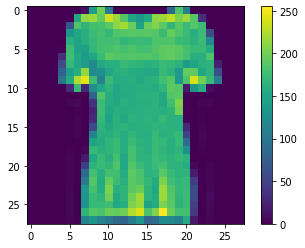

In [ ]:
# inspect one image
plt.figure()
plt.imshow(train_imgs[10])
plt.colorbar()
plt.grid(False)
plt.show()

Every pixel on the image vary from 0 to 255 pixels. To speed training time, we need to preprocess the images and place every pixel into a 0 to 1 scale.

In [ ]:
train_imgs = train_imgs / 255.0
test_imgs  = test_imgs / 255.0

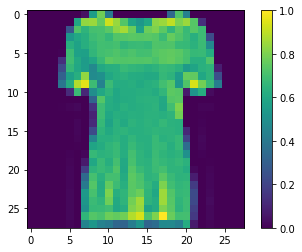

In [ ]:
# reinspect the same image
plt.figure()
plt.imshow(train_imgs[10])
plt.colorbar()
plt.grid(False)
plt.show()

## Build the model

The first layer receives the images. Its input shape must correspond to the same shapes of the images.

The Flatten layer transforms the image into a single dimension vector.

The intermediary Dense layer is the hidden layer, which activation function is ReLu.

The last Dense layer will output the probabilities of an image being of one of the 10 classes. Its activation function is Softmax.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

Now, it's time to compile the model. This step will configure the model before training. The main parameters are:

1 - The loss function: will measure the precision of the model during training.
2 - Optimizer: defines the gradient descent method.
3 - Metrics: used to monitor the accuracy of the model.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Now, it's time to train. During training, the model will receive the training set (train_imgs) and the labels and will try to learn from them.

In [ ]:
model.fit(train_imgs, 
          train_labels, 
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

To evaluate how the model is performing, we test it using a set of data it never saw before. We use the test_imgs set for that. The result a percentage value. In this case, we achieved an accuracy of 88%.

You will see that the accuracy during training phase is higher than when we measure it on a separate set. This is due to overfitting: the model learns very well over the images it knows already, but it's not very good at predicting new information on the same way.

A good exercise for the next days is finding ways to decrease overfitting.

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)
print('\nModel accuracy: {:.0f}%'.format(test_acc*100))

313/313 - 0s - loss: 0.3399 - accuracy: 0.8804

Model accuracy: 88%


## Making predictions

To predict new images, we call the method "predict". It will predict all the images present on a set at once. The result is an array of arrays.

Each one of these arrays contains 10 floats. Each number corresponds to the probability of an image being of a certain label.

In [ ]:
predictions = model.predict(test_imgs)

If you analyse the first prediction, you will realize that the model thinks that this image is an ankle boot (ankle boots correspond to the label number 9).

In [ ]:
predictions[0]

array([2.1791378e-08, 1.7478848e-10, 2.3224722e-09, 8.2666425e-09,
       8.7318801e-09, 1.2310638e-04, 2.8848615e-07, 2.0155476e-02,
       7.4396479e-07, 9.7972041e-01], dtype=float32)

In [ ]:
print('The models thinks that the index {} has the highest probability.'.format(np.argmax(predictions[0])))
print('The index {} corresponds to the label \'{}\'.'.format(np.argmax(predictions[0]), labels[np.argmax(predictions[0])]))

The models thinks that the index 9 has the highest probability.
The index 9 corresponds to the label 'Ankle boot'.


Let's predict all the images at once and get the first 5 predictions.

In [ ]:
predictions_labels = [labels[np.argmax(p)] for p in predictions]
predictions_labels[:5]

['Ankle boot', 'Pullover', 'Pants', 'Pants', 'Shirt']

Let's plot this image to see if the prediction is

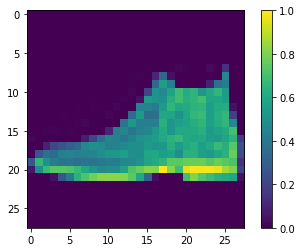

In [ ]:
# reinspect the same image
plt.figure()
plt.imshow(test_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()